29
28
-53.84830000000005
12
12
-25.757749999999973
11
11
-17.56650000000003
9
9
-13.382500000000007
4
3
-5.8500000000000085
1
1
-1.1125000000000007
3
3
-2.8500000000000014
2
2
-1.4625000000000021
{'20': -53.84830000000005, '60': -25.757749999999973, '80': -17.56650000000003, '100': -13.382500000000007, '120': -5.8500000000000085, '140': -1.1125000000000007, '160': -2.8500000000000014, '180': -1.4625000000000021}
140
        Date   Open   High   Low  Close  Volume
0 2019-09-23  22.60  23.10  22.4  22.60    4047
1 2019-09-20  23.25  24.25  22.5  23.65    8980
2 2019-09-19  23.00  23.50  22.8  23.25    4572
3 2019-09-18  22.30  23.90  22.3  23.90    2717
4 2019-09-17  23.50  23.65  22.7  22.95    4388


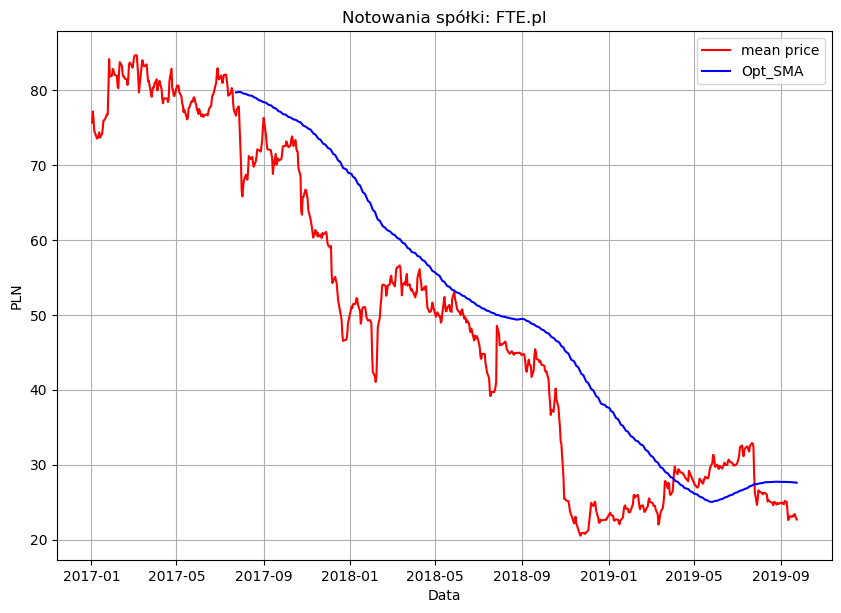

In [62]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()

def modify_source(csv_file):
    result = csv_file.reset_index()
    return result

def mean_serie():
    data_from['Mean'] = (data_from['High'] + data_from['Low'] + data_from['Open'] + data_from['Close']) / 4


def sma():
    windowSizes = [20, 60, 80, 100, 120, 140, 160, 180]
    profits = dict()
    for k in windowSizes:
        data_from['SMA'] = data_from['Mean'].rolling(window=k).mean().shift(1-k)
        buy = []
        sell = []
#         data_from = data_from[::-1]
#         data_from.tail()
#         data_from = data_from.reset_index()
#         data_from.tail()
#         del data_from['index']
#         data_from.tail()
        for i in range(1, len(data_from)):
            if (data_from.loc[i, 'SMA'] < data_from.loc[i,'Mean']) & (data_from.loc[i-1, 'SMA'] >= data_from.loc[i-1,'Mean']):
                buy.append(data_from.loc[i, 'Mean'])
            elif len(buy) != 0:
                if (data_from.loc[i, 'SMA'] > data_from.loc[i,'Mean']) & (data_from.loc[i-1, 'SMA'] <= data_from.loc[i-1,'Mean']):
                    sell.append(data_from.loc[i,'Mean'])
                else:
                    pass
            else: 
                pass
#         print(buy)
        print(len(buy))
#         print(sell)
        print(len(sell))

        outcome = [j - i for i, j in zip(buy, sell)]
        profit_sum = sum(outcome)
        print(profit_sum)
        
        
        def addNumber(k, profit_sum):
            for i in profits:
                if i == k:
                    print('error')
                    return 
            profits[k] = profit_sum

        addNumber('{}'.format(k),profit_sum)
    print(profits)
    optimal_k = int(max(profits, key=profits.get))
    print(optimal_k)
    data_from['Opt_SMA'] = data_from['Mean'].rolling(window=optimal_k).mean().shift(1-optimal_k)
    print(df.head())

for symbol in ['FTE.pl']:
    df = web.DataReader(symbol, 'stooq')
    df = modify_source(df)
    data_from = df.loc[df['Date'] >= '2017-01-01'].copy()
    mean_serie()
    sma()
    x = list(data_from['Date'])
    y = list(data_from['Mean'])
    z = list(data_from['Opt_SMA'])
    plt.figure(figsize=(10,7), dpi=100)
    plt.plot(x, y, color='red', marker='', linestyle='solid', label='mean price')
    plt.plot(x, z, color='blue', marker='', linestyle='solid', label='Opt_SMA')
    plt.title("Notowania spółki: {}".format(symbol))
    plt.ylabel('PLN')
    plt.xlabel("Data")
    plt.grid()
    plt.legend()
    plt.savefig('charts/{}.png'.format(symbol))
    plt.show()    
    
 

